In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

df=pd.read_csv('diabetes.csv')

In [239]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [114]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

# LogisticRegression

In [4]:
df=pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [137]:
df.dropna(inplace=True)

In [138]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [139]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [140]:
feature_cols=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [141]:
feature_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [142]:
x=df[feature_cols]

In [143]:
y=df['TenYearCHD']

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [145]:
model=LogisticRegression()

In [146]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [158]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
conf_mat


array([[615,   4],
       [107,   6]], dtype=int64)

In [364]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)
accuracy_score_LogisticRegression=round(accuracy_score*100,0)
accuracy_score_LogisticRegression


74.0

Text(0.5, 23.52222222222222, 'predict')

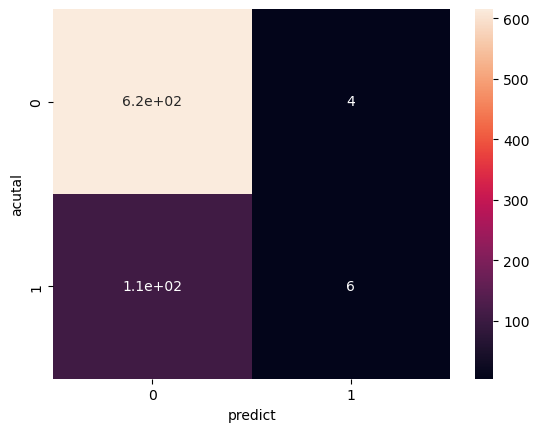

In [164]:
conf_mat=pd.crosstab(y_test, y_pred)
sns.heatmap(conf_mat,annot=True)
plt.ylabel('acutal')
plt.xlabel('predict')

# K Means Clustering


In [166]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings(action='ignore')
df=pd.read_csv('Stores.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [223]:
x=df[['Store_Area','Store_Sales']].values


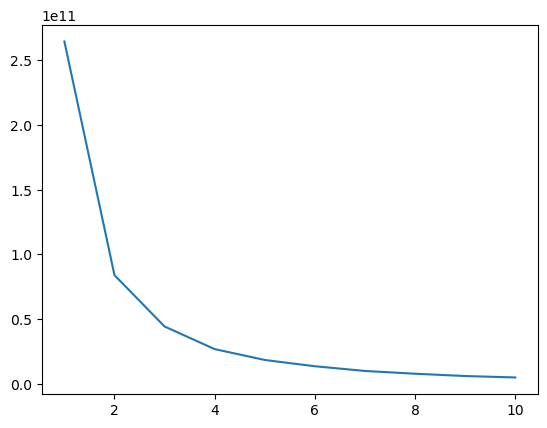

In [224]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)

In [237]:
model=KMeans(n_clusters=3,init='k-means++')
y_means=model.fit_predict(x)
y_means

array([0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0,

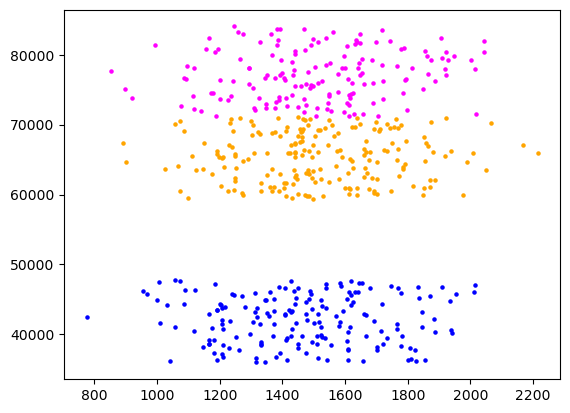

In [236]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=5,c='magenta',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=5,c='blue',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=5,c='orange',label='cluster3')


#  Linear Regression


In [243]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [280]:
x=df.Glucose.values.reshape(-1, 1)
y=df.Outcome.values.reshape(-1, 1)

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state =111)


In [282]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [292]:
r2=r2_score(y_test, y_pred)
r2*100

#Print the results

#print('R-squared (R²) :', r2*100)

#print(f'R-squared as a Percentage: (r2100:.2f))


9.082580910685166

#  Decision Tree Classifier

In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [286]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [288]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=df[feature_cols]
y=df.Outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [294]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=55)


In [295]:
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [329]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
Accuracy_score_Decision_Tree_Classifier=int(Accuracy_score*100)

Confusion Matrix :  [[118  42]
 [ 51  20]]
Accuracy Score :  0.5974025974025974
Accuracy in Percentage :  59 %


<Axes: xlabel='Predicted', ylabel='Actual'>

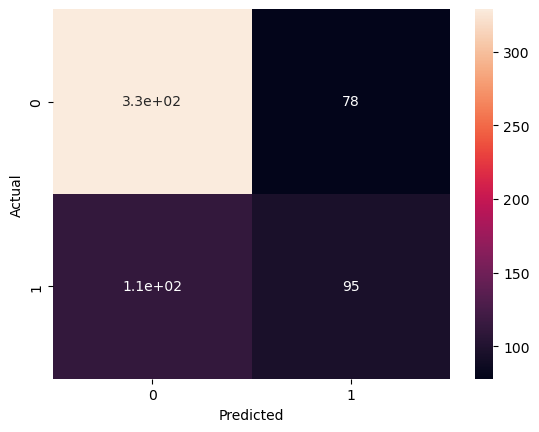

In [297]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
 colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)

[Text(0.3958333333333333, 0.9, 'x[1] <= 114.5\ngini = 0.478\nsamples = 154\nvalue = [93, 61]'),
 Text(0.125, 0.7, 'x[5] <= 27.85\ngini = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.16666666666666666, 0.5, 'x[6] <= 0.507\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.08333333333333333, 0.3, 'x[2] <= 53.0\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.1, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.25, 0.3, 'x[7] <= 29.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.7, 'x[5] <= 28.05\ngini = 0.486\nsamples = 91\nvalue = [38, 53]'),
 Text(0.5, 0.5, 'x[1] <= 125.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.4166

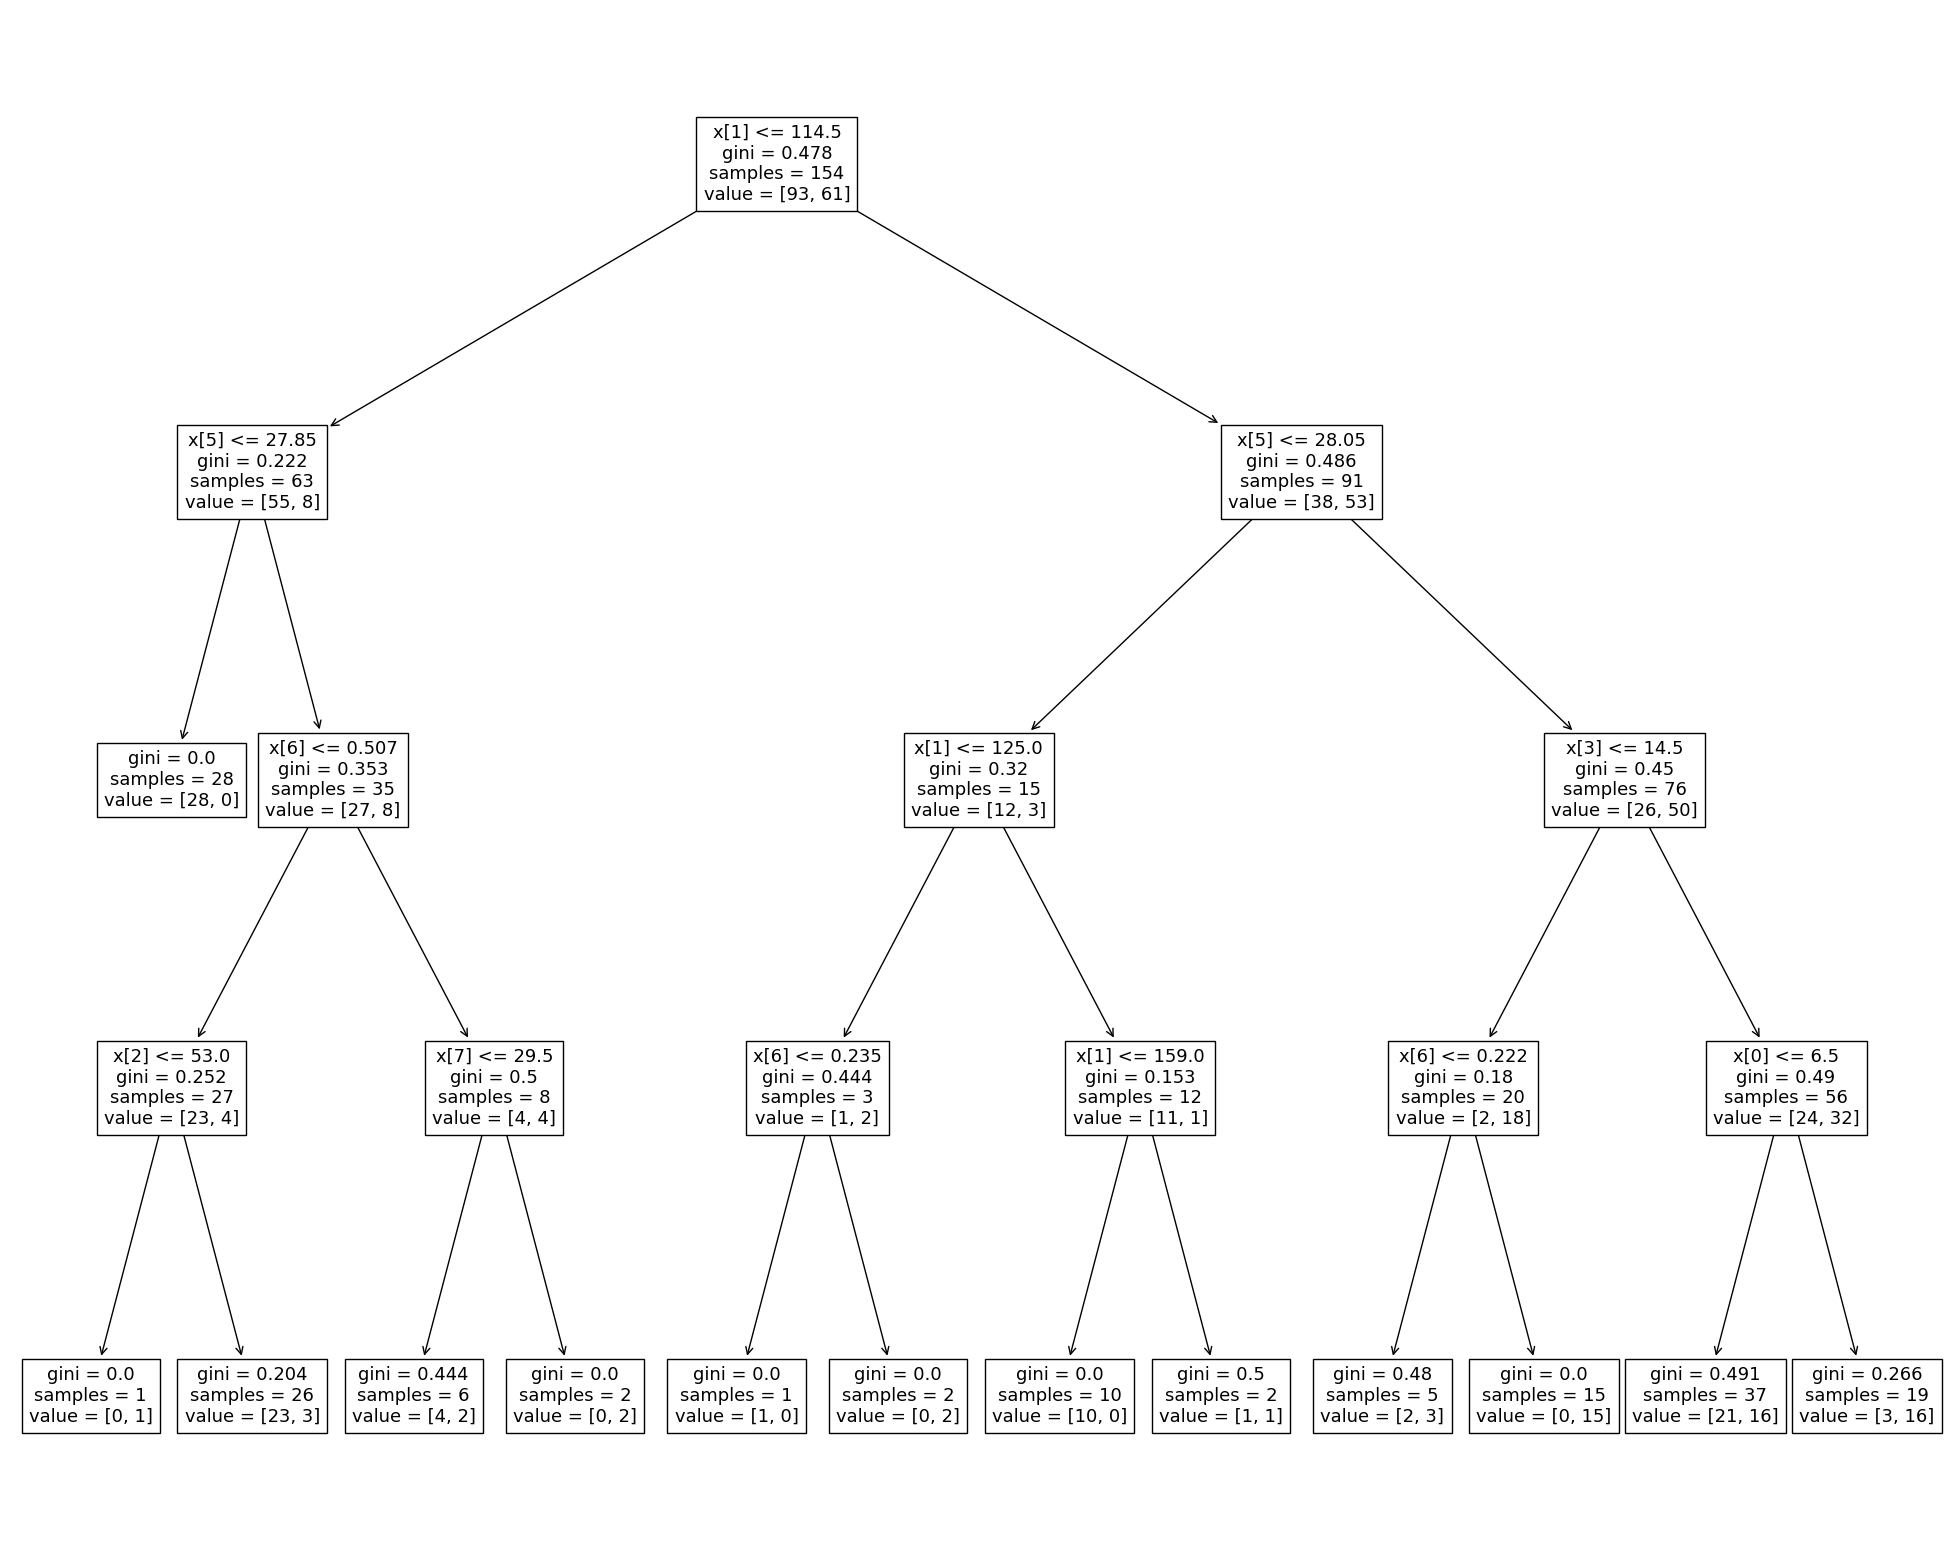

In [298]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(model)
#fig.savefig('decistion_tree.png')

# Random Forest

In [344]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree


In [345]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=df[feature_cols]
y=df.Outcome

In [346]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [347]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=26)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [354]:
print('Random Forest Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))
Accuracy_score_RandomForestClassifier=round(Accuracy_score*100,0)

Random Forest Classifier

 Confusion Matrix : 
 [[124  24]
 [ 38  45]]
Accuracy Score :  0.7316017316017316
Accuracy in Percentage :  73 %

               precision    recall  f1-score   support

           0       0.84      0.77      0.80       162
           1       0.54      0.65      0.59        69

    accuracy                           0.73       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.75      0.73      0.74       231



[Text(0.5, 1.0, 'Random ForestClassifier')]

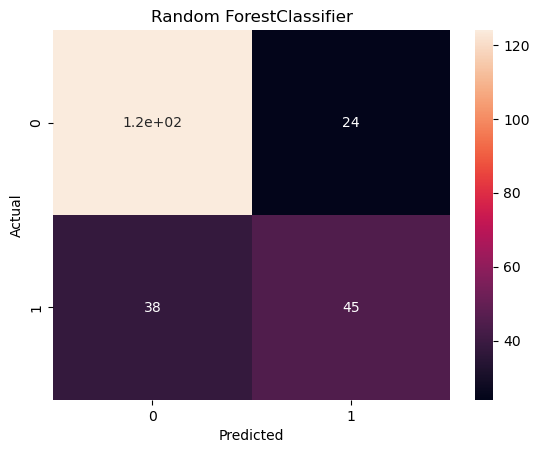

In [304]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='Random ForestClassifier')

# K Nearest Neighbors



In [305]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [306]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=df[feature_cols]
y=df.Outcome

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.3, random_state=0)


In [359]:
results=[]
for i in [1,2,3,4,5]:
    model = KNeighborsClassifier(n_neighbors=i,
metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    Accuracy_score=metrics.accuracy_score(y_test, y_pred)
    results.append(Accuracy_score)
print('KNN [ minkowski ]')
print('for n_neighbor=5 : ')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : ', conf_mat)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))
print(results)
Accuracy_score_KNeighborsClassifier=int(Accuracy_score*100)

KNN [ minkowski ]
for n_neighbor=5 : 

 Confusion Matrix :  [[120  28]
 [ 32  51]]
Accuracy Score :  0.7402597402597403
Accuracy in Percentage :  74 %

               precision    recall  f1-score   support

           0       0.81      0.79      0.80       152
           1       0.61      0.65      0.63        79

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

[0.6796536796536796, 0.7402597402597403, 0.7272727272727273, 0.7272727272727273, 0.7402597402597403]


[Text(0.5, 1.0, 'KNN [diabetes,neighbor=5 ]')]

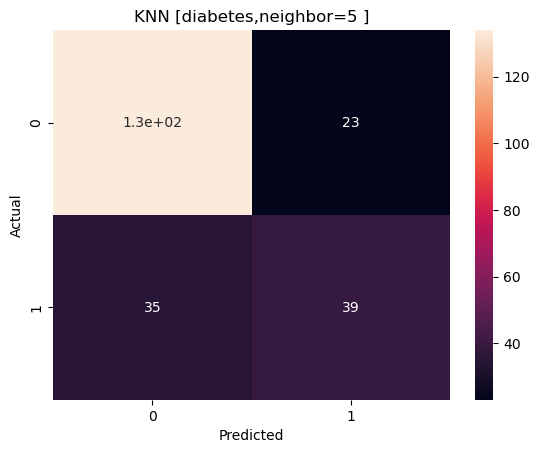

In [312]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [diabetes,neighbor=5 ]')

# Support Vector Machine

In [313]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn


In [314]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=df[feature_cols]
y=df.Outcome

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.3, random_state=5)

In [316]:
model= SVC(kernel='rbf',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1]


In [317]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - rbf ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - rbf ]
Confusion Matrix : 
 [[140  20]
 [ 30  41]]
Accuracy Score :  0.7835497835497836
Accuracy in Percentage :  78 %
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       170
           1       0.58      0.67      0.62        61

    accuracy                           0.78       231
   macro avg       0.73      0.75      0.73       231
weighted avg       0.80      0.78      0.79       231



[Text(0.5, 1.0, 'SVC [rbf]')]

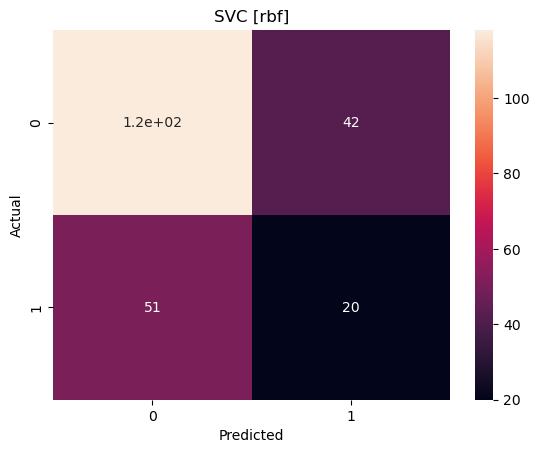

In [318]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

In [319]:
model= SVC(kernel='linear',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [356]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - linear ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))
Accuracy_score_Support_Vector_Machine=int(Accuracy_score*100)

SVC [ kernerl - linear ]
Confusion Matrix : 
 [[98 50]
 [57 26]]
Accuracy Score :  0.5367965367965368
Accuracy in Percentage :  53 %
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       155
           1       0.31      0.34      0.33        76

    accuracy                           0.54       231
   macro avg       0.49      0.49      0.49       231
weighted avg       0.55      0.54      0.54       231



[Text(0.5, 1.0, 'SVC [linear]')]

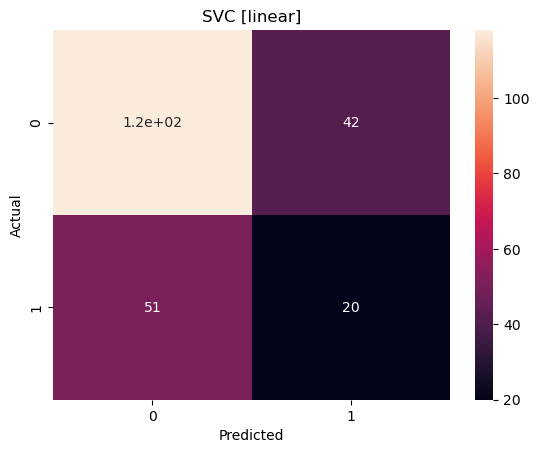

In [321]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')

# TESTING THE BEST FIT MODEL

In [366]:
Accuracy_score_Decision_Tree_Classifier

59

In [360]:
Accuracy_score_KNeighborsClassifier

74

In [362]:
Accuracy_score_RandomForestClassifier

73.0

In [365]:
accuracy_score_LogisticRegression

74.0

In [371]:
scores = [Accuracy_score_Decision_Tree_Classifier,Accuracy_score_KNeighborsClassifier,Accuracy_score_RandomForestClassifier,accuracy_score_LogisticRegression]
algorithms = ["Decision_Tree","KNeighborsClassifier","RandomForestClassifier","LogisticRegression"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision_Tree is: 59 %
The accuracy score achieved using KNeighborsClassifier is: 74 %
The accuracy score achieved using RandomForestClassifier is: 73.0 %
The accuracy score achieved using LogisticRegression is: 74.0 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

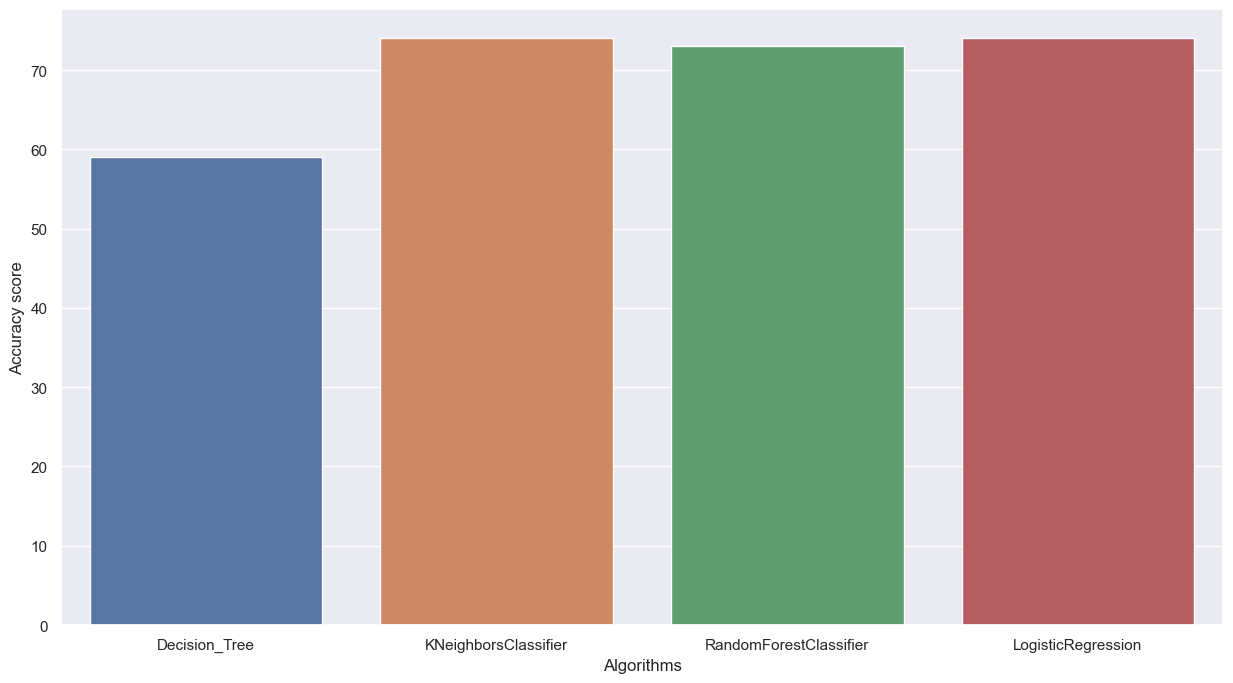

In [373]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

# CONCLUSION :
####  It looks like you found that the Logistic Regression model performed the best among the models you tried: Decision Tree, KNeighborsClassifier, RandomForestClassifier, and Logistic Regression.